In [ ]:
! pip install pycaret


In [6]:
from pycaret.regression import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [7]:
data = pd.read_csv("/content/hour.csv")
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [8]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
data.shape

(17379, 17)

In [11]:
data["dteday"] = pd.to_datetime(data["dteday"])

In [16]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [12]:
data = data.drop('casual', axis=1 )
data = data.drop('registered', axis =1)

In [13]:
data.head()



,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [16]:
model = setup(data , target = 'cnt', remove_multicollinearity=True , train_size=.7,
              polynomial_features =True , trigonometry_features = True , feature_interaction = True
              
              )

 
Setup Succesfully Completed!


,Description,Value
0,session_id,8587
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(17379, 15)"
4,Missing Values,False
5,Numeric Features,6
6,Categorical Features,7
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [17]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,26.110500,1698.376200,41.180900,0.947500,0.406900,0.402500
1,CatBoost Regressor,26.339900,1715.458900,41.389400,0.947000,0.427500,0.427300
2,Extra Trees Regressor,25.657000,1749.195800,41.778100,0.946000,0.340700,0.311800
3,Random Forest,26.920200,1924.688700,43.826900,0.940600,0.349100,0.325900
4,K Neighbors Regressor,35.542800,3362.297700,57.949800,0.896200,0.406300,0.395700
5,Decision Tree,36.018900,3679.413600,60.537600,0.886400,0.461400,0.395300
6,Extreme Gradient Boosting,41.857700,3986.718100,63.091700,0.877200,0.613900,0.800900
7,Gradient Boosting Regressor,41.798600,3988.367500,63.111700,0.877100,0.602000,0.787000
8,AdaBoost Regressor,89.903900,11569.572800,107.530200,0.643300,1.188900,3.580200
9,Support Vector Machine,85.192000,18351.869200,135.397900,0.434800,0.895900,1.297400


In [19]:
lgbm = create_model("lightgbm")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,27.2582,1829.9107,42.7775,0.9445,0.4297,0.4648
1,24.8626,1512.2216,38.8873,0.9532,0.4040,0.3991
2,25.8637,1567.9508,39.5974,0.9538,0.4252,0.4184
3,25.9119,1771.6487,42.0910,0.9409,0.4011,0.3785
4,26.0490,1730.1058,41.5945,0.9467,0.3900,0.3970
5,26.1644,1721.9979,41.4970,0.9452,0.3693,0.3355
6,25.4711,1700.8007,41.2408,0.9524,0.3964,0.3882
7,25.7907,1592.2954,39.9036,0.9514,0.4267,0.4249
8,25.1444,1587.1805,39.8394,0.9479,0.4251,0.4179
9,28.5889,1969.6498,44.3807,0.9393,0.4011,0.4009


In [21]:
tuned_lgbm = tune_model("lightgbm")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,24.6576,1627.7767,40.3457,0.9506,0.3678,0.3627
1,23.4395,1424.7847,37.7463,0.9559,0.3539,0.2909
2,23.1699,1280.5803,35.7852,0.9623,0.3513,0.3167
3,23.5102,1570.4351,39.6287,0.9476,0.3521,0.3005
4,23.4459,1510.4996,38.8651,0.9534,0.3307,0.2933
5,24.0698,1516.3907,38.9409,0.9517,0.3539,0.2984
6,24.1313,1537.8985,39.2160,0.9570,0.3554,0.3486
7,23.6432,1375.8307,37.0922,0.9580,0.3756,0.3426
8,23.8313,1517.7378,38.9582,0.9502,0.3799,0.3414
9,25.3103,1577.7390,39.7208,0.9514,0.3651,0.3250


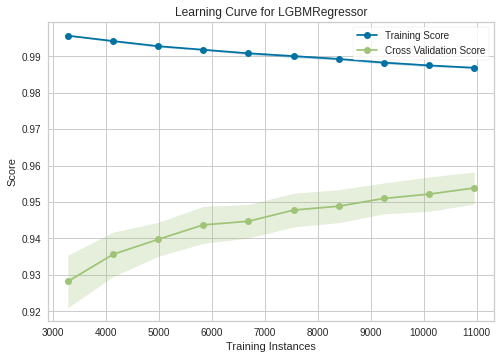

In [24]:
plot_model(tuned_lgbm,plot = 'learning')

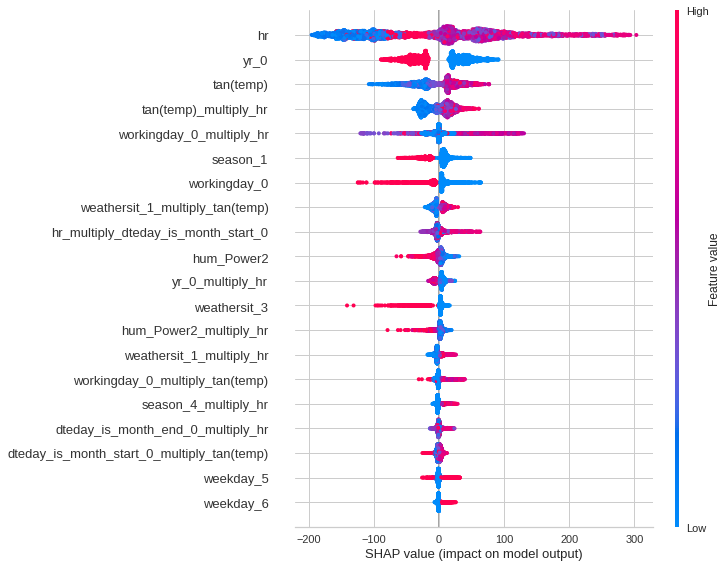

In [25]:
interpret_model(tuned_lgbm)

In [26]:
pred_holdout = predict_model(tuned_lgbm)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,24.7393,1763.8029,41.9977,0.9479,0.3459,0.3067


In [29]:
pred_holdout.head(20)

,hr,windspeed,tan(temp),hum_Power2,season_1,season_2,season_3,season_4,yr_0,mnth_10,mnth_11,mnth_3,mnth_5,mnth_7,mnth_8,holiday_1,weekday_1,weekday_2,weekday_3,weekday_5,weekday_6,workingday_0,weathersit_1,weathersit_2,weathersit_3,weathersit_4,dteday_month_1,dteday_month_12,dteday_month_2,dteday_month_4,dteday_month_6,dteday_month_9,dteday_weekday_3,dteday_weekday_6,dteday_is_month_end_0,dteday_is_month_start_0,dteday_is_month_end_0_multiply_hr,tan(temp)_multiply_hr,hr_multiply_dteday_is_month_end_0,hr_multiply_dteday_is_month_start_0,weathersit_1_multiply_hr,hr_multiply_windspeed,dteday_is_month_end_0_multiply_tan(temp),weathersit_1_multiply_tan(temp),hum_Power2_multiply_hr,hr_multiply_tan(temp),season_4_multiply_hr,dteday_is_month_start_0_multiply_tan(temp),dteday_is_month_start_0_multiply_hr,yr_0_multiply_hr,hr_multiply_weathersit_1,workingday_0_multiply_hr,workingday_0_multiply_tan(temp),cnt,Label
0,22.0,0.1343,0.713909,0.3249,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,22.0,15.705998,22.0,22.0,22.0,2.9546,0.713909,0.713909,7.1478,15.705998,0.0,0.713909,22.0,22.0,22.0,0.0,0.000000,191,147.3038
1,18.0,0.2836,0.744544,0.0529,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,18.0,13.401789,18.0,18.0,18.0,5.1048,0.744544,0.744544,0.9522,13.401789,0.0,0.744544,18.0,0.0,18.0,0.0,0.000000,596,704.8367
2,7.0,0.1940,0.422793,0.5776,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,7.0,2.959553,7.0,7.0,7.0,1.3580,0.422793,0.422793,4.0432,2.959553,7.0,0.422793,7.0,7.0,7.0,0.0,0.000000,314,293.9754
3,22.0,0.1642,0.713909,0.3721,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,22.0,15.705998,22.0,22.0,0.0,3.6124,0.713909,0.000000,8.1862,15.705998,0.0,0.713909,22.0,0.0,0.0,22.0,0.713909,131,125.5295
4,1.0,0.2985,0.713909,0.6084,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.713909,1.0,1.0,0.0,0.2985,0.713909,0.000000,0.6084,0.713909,0.0,0.713909,1.0,0.0,0.0,1.0,0.713909,59,75.4135
5,19.0,0.2537,0.353737,0.2809,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,19.0,6.721001,19.0,19.0,19.0,4.8203,0.353737,0.353737,5.3371,6.721001,19.0,0.353737,19.0,19.0,19.0,0.0,0.000000,265,244.2862
6,14.0,0.2836,0.950451,0.4356,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,14.0,13.306320,14.0,14.0,14.0,3.9704,0.950451,0.950451,6.0984,13.306320,0.0,0.950451,14.0,14.0,14.0,0.0,0.000000,163,150.2668
7,10.0,0.2985,0.266022,0.2304,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,10.0,2.660215,10.0,10.0,10.0,2.9850,0.266022,0.266022,2.3040,2.660215,0.0,0.266022,10.0,10.0,10.0,0.0,0.000000,57,49.9967
8,12.0,0.0000,0.376403,0.0529,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,12.0,4.516834,12.0,12.0,0.0,0.0000,0.376403,0.000000,0.6348,4.516834,0.0,0.376403,12.0,12.0,0.0,0.0,0.000000,99,106.2592
9,23.0,0.0896,0.744544,0.4225,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,23.0,17.124508,23.0,23.0,23.0,2.0608,0.744544,0.744544,9.7175,17.124508,0.0,0.744544,23.0,0.0,23.0,23.0,0.744544,235,184.5115


In [39]:
finalize_model(tuned_lgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=90,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.7,
              n_estimators=170, n_jobs=-1, num_leaves=80, objective=None,
              random_state=8587, reg_alpha=0.6, reg_lambda=0.5, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [40]:
save_model(tuned_lgbm,"Bike_pred_lgbm")

Transformation Pipeline and Model Succesfully Saved


In [30]:
unseen_data = pd.read_csv("unseen.csv")

In [31]:
unseen_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,8000,2013-01-01,3,0,1,0,0,6,0,1,0.24,0.2879,0.81,0,3,13,30


In [35]:
unseen_data = unseen_data.drop('casual',axis =1)
unseen_data = unseen_data.drop('registered',axis = 1)


In [36]:
unseen_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,8000,2013-01-01,3,0,1,0,0,6,0,1,0.24,0.2879,0.81,0,30


In [37]:
pred = predict_model(tuned_lgbm, data= unseen_data)

In [41]:
pred

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Label
0,8000,2013-01-01,3,0,1,0,0,6,0,1,0.24,0.2879,0.81,0,30,40.6759
